In [18]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('../../data/llm_responses.csv')

chart = alt.Chart(df).mark_line().encode(
    x=alt.X('temp:Q', title='Temperature'),
    y=alt.Y('score:Q', title='Cosine Similarity Score'),
    color=alt.Color('appid:N', title='App ID')
).properties(
    width=600,
    height=400,
    title='Cosine Similarity vs Temperature for Each App'
)

chart

alt.Chart(...)

In [12]:
df2 = pd.read_csv('../../data/llm_responses_single.csv')

chart2 = alt.Chart(df2).mark_boxplot(extent='min-max').encode(
    x=alt.X('appid:N', title='App ID'),
    y=alt.Y('score:Q', title='Cosine Similarity Score', scale=alt.Scale(domain=[0.5, 0.62])),
    color='appid:N'
).facet(
    column=alt.Column('temp:N', title='Temperature')
).properties(
    title='Cosine Similarity Distribution per Temperature'
)

chart2

alt.FacetChart(...)

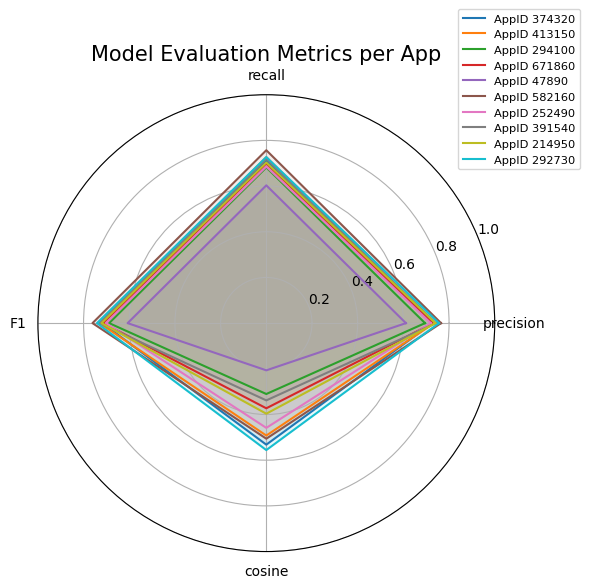

In [53]:
df3 = pd.read_csv('../../data/llm_responses_all_metrics.csv')

metrics = ['precision', 'recall', 'F1', 'cosine']
num_vars = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in df3.iterrows():
    values = row[metrics].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f"AppID {int(row['appid'])}")
    ax.fill(angles, values, alpha=0.1)


ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'])

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2), fontsize=8.2)
plt.title("Model Evaluation Metrics per App", size=15)
plt.tight_layout()
plt.show()

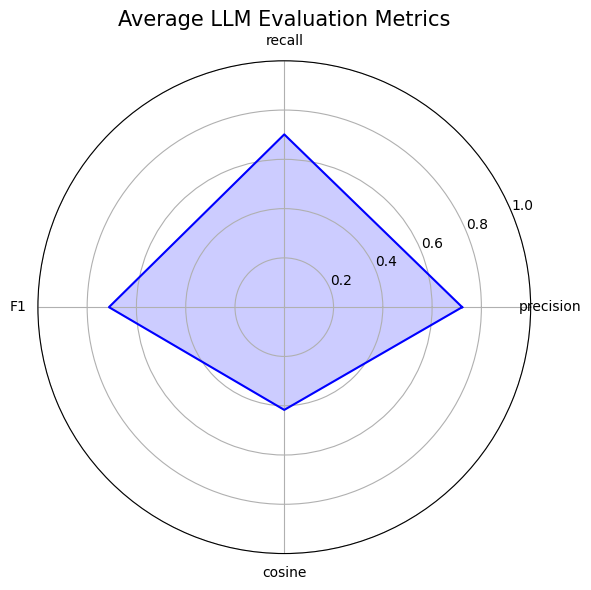

In [54]:
df3 = pd.read_csv('../../data/llm_responses_all_metrics.csv')

metrics = ['precision', 'recall', 'F1', 'cosine']
num_vars = len(metrics)
averages = df3[metrics].mean().tolist()
averages += averages[:1]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, averages, label="Average", color='blue')
ax.fill(angles, averages, color='blue', alpha=0.2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'])

plt.title("Average LLM Evaluation Metrics", size=15)
plt.tight_layout()
plt.show()